In [1]:
import pandas as pd
from IPython.display import display, Markdown

# Load instacart datasset
data = pd.read_excel('merged_instacart_data.xlsx')

# Display the first few rows to understand the data
display(Markdown("### Load the Dataset"))
display(data.head())

### Load the Dataset

,order_id,user_id,order_number,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,1,8,NaN,196.0,1.0,0.0,Soda,77.0,7.0,soft drinks,beverages
1,2539329,1,1,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,soy lactosefree,dairy eggs
2,2539329,1,1,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,popcorn jerky,snacks
3,2539329,1,1,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,popcorn jerky,snacks
4,2539329,1,1,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,paper goods,household


### Univariate Analysis - Summary statistics/ Histograms/ Box Plot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   user_id                 5000 non-null   int64  
 2   order_number            5000 non-null   int64  
 3   order_hour_of_day       5000 non-null   int64  
 4   days_since_prior_order  4615 non-null   float64
 5   product_id              4962 non-null   float64
 6   add_to_cart_order       4962 non-null   float64
 7   reordered               4962 non-null   float64
 8   product_name            4962 non-null   object 
 9   aisle_id                4962 non-null   float64
 10  department_id           4962 non-null   float64
 11  aisle                   4962 non-null   object 
 12  department              4962 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 507.9+ KB
None


,order_id,user_id,order_number,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id
count,5.000000e+03,5000.000000,5000.000000,5000.000000,4615.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000
mean,1.693340e+06,22.306000,14.588600,12.696800,12.868256,24933.647723,8.135429,0.513503,71.428859,10.159613
std,9.600881e+05,10.652599,18.199769,3.792486,9.726782,14119.053006,7.048469,0.499868,38.392276,6.187906
min,7.099000e+03,1.000000,1.000000,0.000000,0.000000,23.000000,1.000000,0.000000,1.000000,1.000000
25%,8.758850e+05,14.000000,4.000000,10.000000,6.000000,13163.250000,3.000000,0.000000,31.000000,4.000000
50%,1.673511e+06,26.500000,8.000000,12.000000,9.000000,24535.000000,6.000000,1.000000,79.000000,7.000000
75%,2.562704e+06,31.000000,16.000000,15.000000,20.000000,36659.250000,11.000000,1.000000,107.000000,16.000000
max,3.408319e+06,39.000000,82.000000,23.000000,30.000000,49683.000000,46.000000,1.000000,134.000000,21.000000


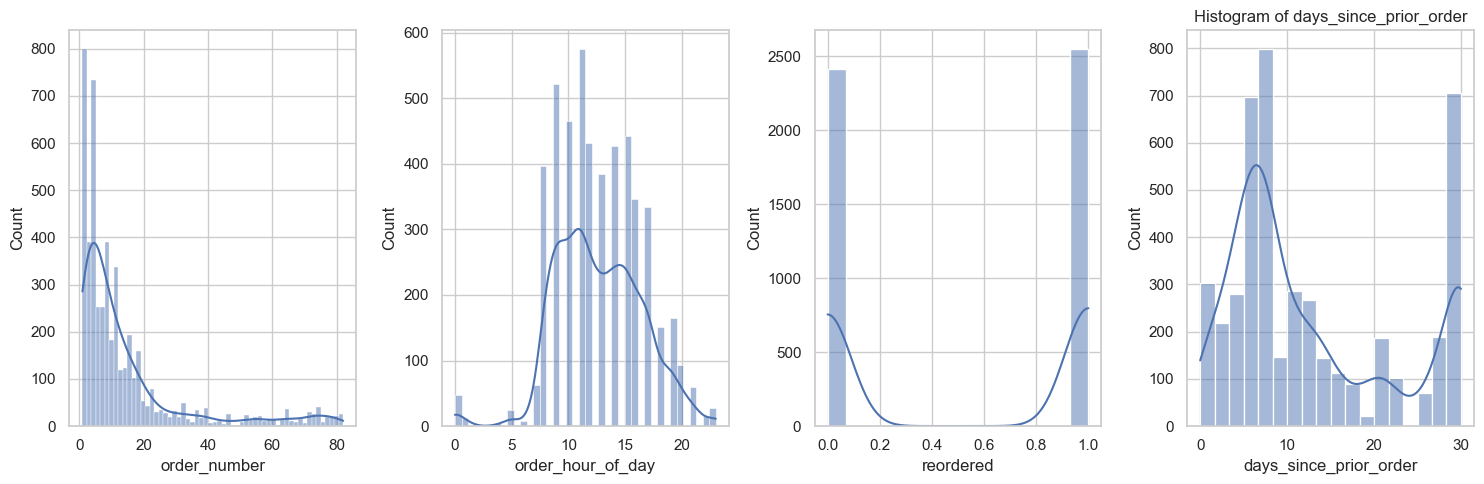

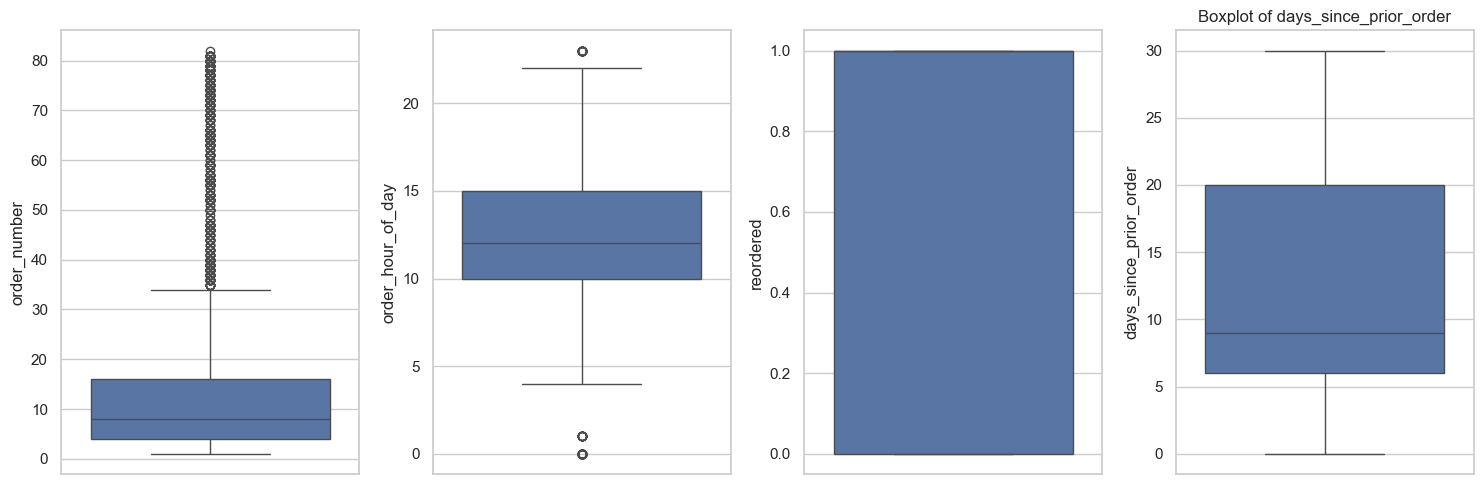

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

display(Markdown("### Univariate Analysis - Summary statistics/ Histograms/ Box Plot"))

# Summary of the DataFrame
print(data.info())

# Get descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's numerical features
display(data.describe())

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot histograms for numerical features (order_number, order_hour_of_day, product_id, & days_since_prior_order)
numerical_features = ['order_number', 'order_hour_of_day', 'reordered', 'days_since_prior_order']

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], ax=axes[i], kde=True)
axes[i].set_title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

# Plot boxplots for numerical features
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    sns.boxplot(y=data[feature], ax=axes[i])
axes[i].set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


### Bivariate Analysis - Correlation matrix/ Pair plots/ Heatmap

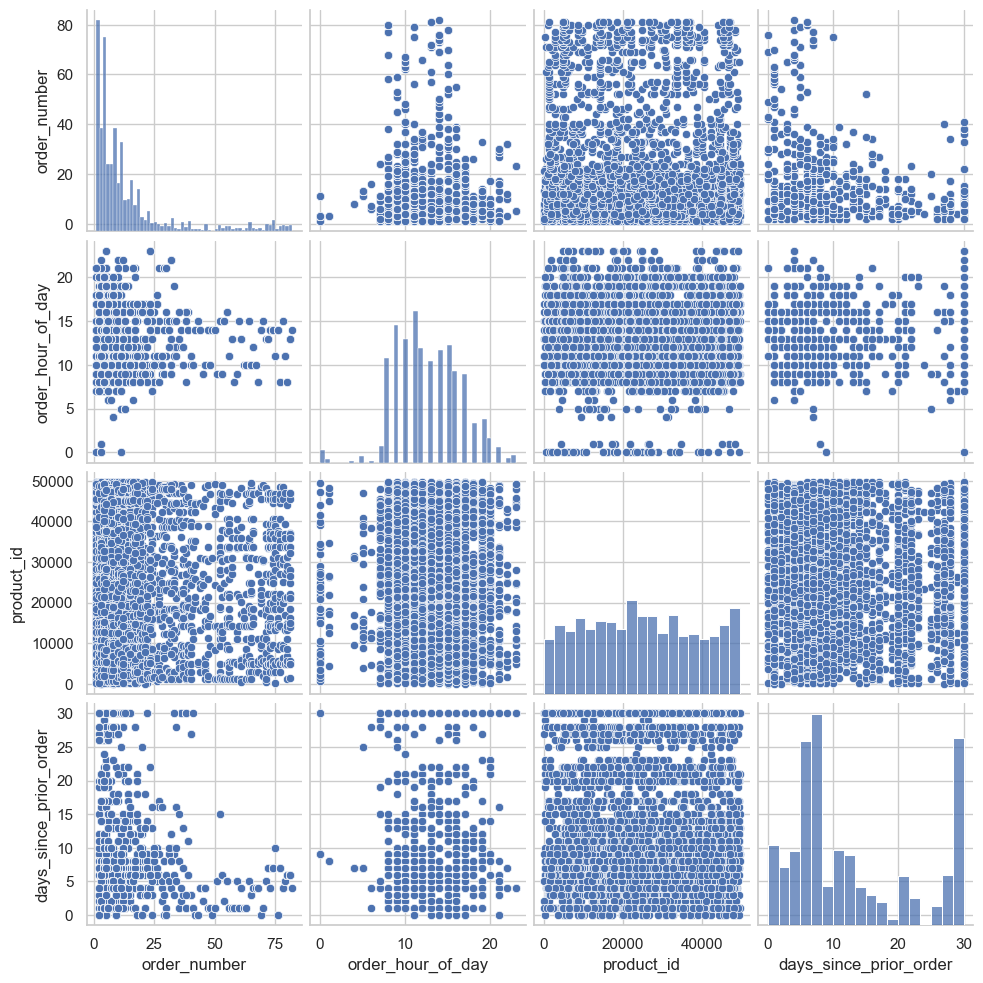

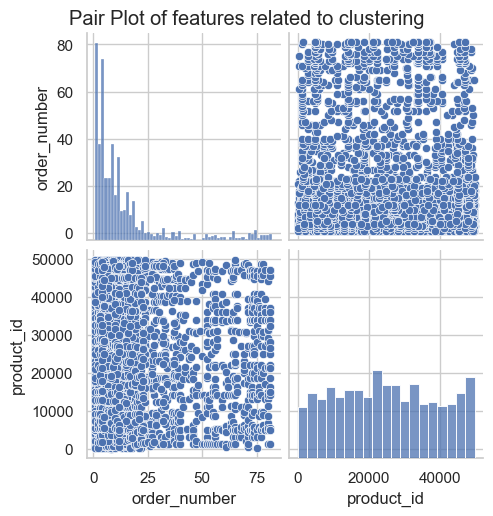

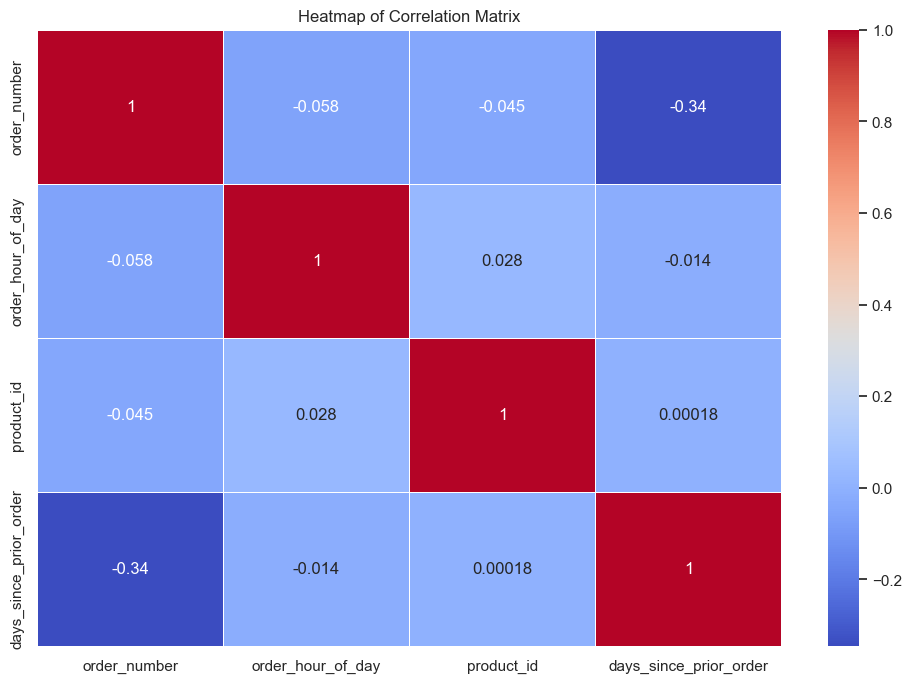

In [3]:
display(Markdown("### Bivariate Analysis - Correlation matrix/ Pair plots/ Heatmap"))

# Pair plots visualization relationships
sns.pairplot(data,vars=['order_number', 'order_hour_of_day', 'product_id', 'days_since_prior_order'])
sns.pairplot(data,vars=['order_number', 'product_id'])
plt.suptitle('Pair Plot of features related to clustering', y=1.02)
plt.show()

# Heatmap of correlation matrix
corr_matrix = data[['order_number', 'order_hour_of_day', 'product_id', 'days_since_prior_order']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [4]:
display(Markdown("### Data Preprocessing - Handling Missing Values"))

# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

# Fill missing values
data['order_number'].fillna(data['order_number'].mode(), inplace=True)
data['reordered'].fillna(data['reordered'].mode(), inplace=True)
data['order_hour_of_day'].fillna(data['order_hour_of_day'].mode()[0], inplace=True)
data['product_id'].fillna(data['product_id'].mode(), inplace=True)
data['days_since_prior_order'].fillna(data['days_since_prior_order'].mode(), inplace=True)

# Verify that there are no remaining missing values
missing_values_after = data.isnull().sum()
print(f"Missing values after cleaning:\n{missing_values_after}")

# Get a concise summary of the DataFrame
print(data.info())

### Data Preprocessing - Handling Missing Values

Missing values in each column:
order_id                    0
user_id                     0
order_number                0
order_hour_of_day           0
days_since_prior_order    385
product_id                 38
add_to_cart_order          38
reordered                  38
product_name               38
aisle_id                   38
department_id              38
aisle                      38
department                 38
dtype: int64
Missing values after cleaning:
order_id                    0
user_id                     0
order_number                0
order_hour_of_day           0
days_since_prior_order    384
product_id                 38
add_to_cart_order          38
reordered                  38
product_name               38
aisle_id                   38
department_id              38
aisle                      38
department                 38
dtype: int64


C:\Users\cis101\AppData\Local\Temp\ipykernel_11160\719733535.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['order_number'].fillna(data['order_number'].mode(), inplace=True)
C:\Users\cis101\AppData\Local\Temp\ipykernel_11160\719733535.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   user_id                 5000 non-null   int64  
 2   order_number            5000 non-null   int64  
 3   order_hour_of_day       5000 non-null   int64  
 4   days_since_prior_order  4616 non-null   float64
 5   product_id              4962 non-null   float64
 6   add_to_cart_order       4962 non-null   float64
 7   reordered               4962 non-null   float64
 8   product_name            4962 non-null   object 
 9   aisle_id                4962 non-null   float64
 10  department_id           4962 non-null   float64
 11  aisle                   4962 non-null   object 
 12  department              4962 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 507.9+ KB
None


In [5]:
from sklearn.preprocessing import OneHotEncoder

display(Markdown("### Data Preprocessing - One-Hot-Encoding"))

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Select categorical variables for encoding
categorical_features = data[['product_name', 'aisle', 'department']]

# Apply one-hot encoding
encoded_features = encoder.fit_transform(categorical_features)

# Convert the encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['product_name', 'aisle', 'department']))

# Drop original categorical columns and concatenate encoded features
data.drop(columns=['order_id', 'user_id', 'aisle_id'], inplace=True)
data = pd.concat([data, encoded_df], axis=1)

# Display the first few rows to verify the changes
display(data.head())

### Data Preprocessing - One-Hot-Encoding

,order_number,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,aisle,department,...,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks,department_nan
0,1,8,30.0,196.0,1.0,0.0,Soda,7.0,soft drinks,beverages,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,16.0,soy lactosefree,dairy eggs,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,19.0,popcorn jerky,snacks,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,19.0,popcorn jerky,snacks,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,17.0,paper goods,household,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
display(Markdown("### Data Preprocessing - Categorical features against department"))

# Cross-tabulations for categorical features against 'product_id and 'reordered'
crosstab = pd.crosstab(data["product_id"], data["reordered"], margins=True)
print(crosstab)

### Data Preprocessing - Categorical features against department

reordered    0.0   1.0   All
product_id                  
23.0           1     0     1
34.0           1     1     2
79.0           1     0     1
93.0           1     0     1
95.0           1     0     1
...          ...   ...   ...
49617.0        1     0     1
49662.0        1     0     1
49680.0        1     0     1
49683.0        3     4     7
All         2414  2548  4962

[1859 rows x 3 columns]


In [7]:
display(Markdown("### Data Preprocessing - Feature Engineering"))

# Create new feature 'department' to display the amount of expenditure alloted per income
#data['department'] = data['department'] + data['aisle']
reordered_rate = data.groupby('product_id')['reordered'].mean().reset_index()
reordered_rate.rename(columns = {'reordered':'average_reordered_rate'}, inplace=True)
data=data.merge(reordered_rate, on = 'product_id', how='left')

# Display the first few rows to verify the changes
display(data.head())

### Data Preprocessing - Feature Engineering

,order_number,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,department_id,aisle,department,...,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks,department_nan,average_reordered_rate
0,1,8,30.0,196.0,1.0,0.0,Soda,7.0,soft drinks,beverages,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.761905
1,1,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,16.0,soy lactosefree,dairy eggs,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,1,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,19.0,popcorn jerky,snacks,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.900000
3,1,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,19.0,popcorn jerky,snacks,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.500000
4,1,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,17.0,paper goods,household,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000


### Machine Learning Models Implementation

In [8]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error, silhouette_score, precision_score, recall_score, f1_score, confusion_matrix
#from sklearn.cluster import KMeans
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

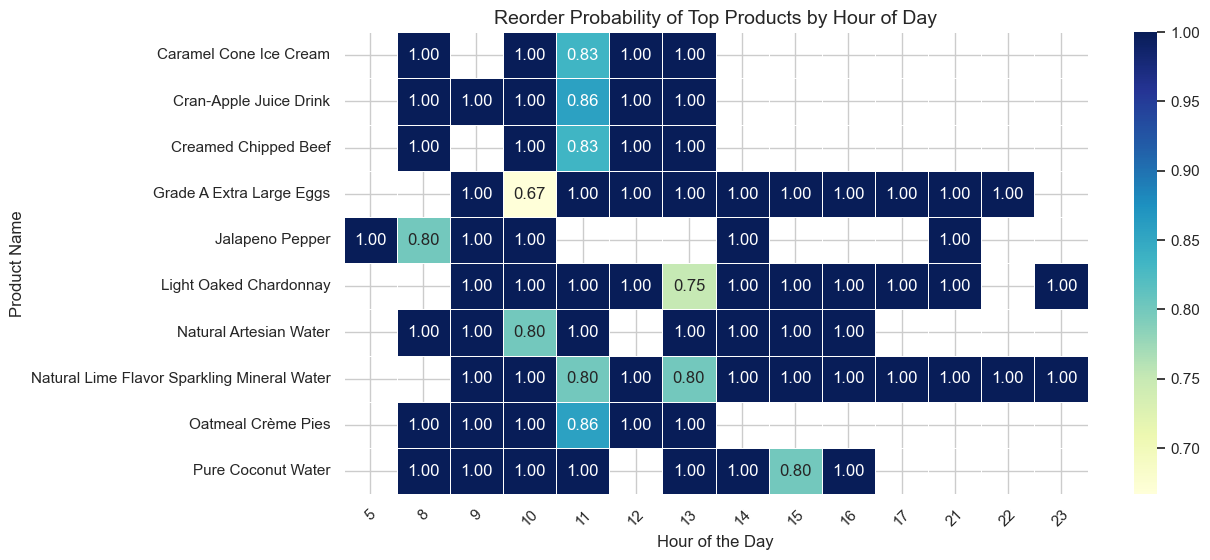

In [12]:
# Drop rows with missing values in relevant columns
data_cleaned = data.dropna(subset=['order_hour_of_day', 'days_since_prior_order', 'reordered'])

# Select features and target variable
features = ['order_hour_of_day', 'days_since_prior_order']
target = 'reordered'

X = data_cleaned[features]
y = data_cleaned[target].astype(int)  # Ensure target is an integer

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy, report

# Group by product and order hour to calculate reorder probability
reorder_prob = data.groupby(['product_name', 'order_hour_of_day'])['reordered'].mean().reset_index()

# Select top products with high reorder probability
top_products = reorder_prob.groupby('product_name')['reordered'].mean().nlargest(10).index
filtered_data = reorder_prob[reorder_prob['product_name'].isin(top_products)]

# Plot a heatmap of reorder probability by hour for top products
plt.figure(figsize=(12, 6))
pivot_data = filtered_data.pivot(index='product_name', columns='order_hour_of_day', values='reordered')

sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Reorder Probability of Top Products by Hour of Day", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()

C:\Users\cis101\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5331 - loss: 0.6965 - val_accuracy: 0.5710 - val_loss: 0.6823
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5650 - loss: 0.6820 - val_accuracy: 0.5928 - val_loss: 0.6770
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5845 - loss: 0.6783 - val_accuracy: 0.6004 - val_loss: 0.6757
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6029 - loss: 0.6715 - val_accuracy: 0.5983 - val_loss: 0.6754
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5809 - loss: 0.6761 - val_accuracy: 0.6015 - val_loss: 0.6751
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5940 - loss: 0.6724 - val_accuracy: 0.5950 - val_loss: 0.6745
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5887 - loss: 0.6747 - val_accuracy: 0.5939 - val_loss: 0.6741
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6026 - loss: 0.6695 - val_accuracy: 

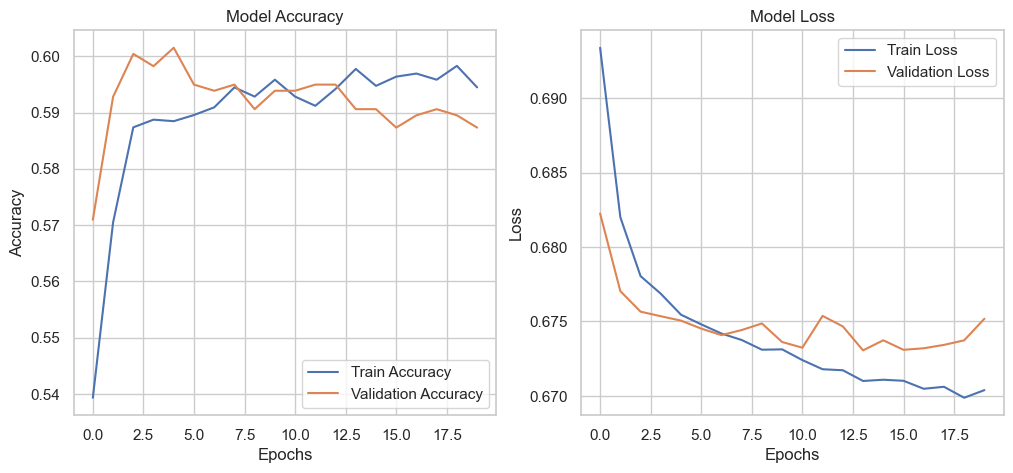

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Normalize the features
X_train_norm = (X_train - X_train.mean()) / X_train.std()
X_test_norm = (X_test - X_test.mean()) / X_test.std()

# Define the neural network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_norm.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=20, batch_size=32, verbose=1)

# Plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot accuracy
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plot loss
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

# Show plots
plt.show()

### Scenario Analysis

C:\Users\cis101\AppData\Local\Temp\ipykernel_11160\1769761799.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='aisle', y='reordered', data=aisle_reorder_rate, palette='viridis')


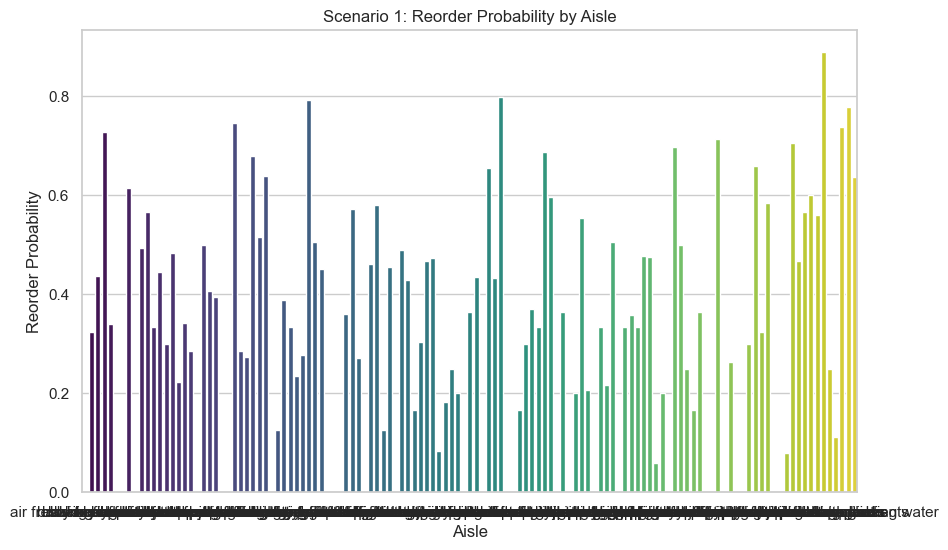

In [20]:
# Scenario 1: Reorder Probability by Aisle
aisle_reorder_rate = data.groupby('aisle')['reordered'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='aisle', y='reordered', data=aisle_reorder_rate, palette='viridis')
plt.title('Scenario 1: Reorder Probability by Aisle')
plt.xlabel('Aisle')
plt.ylabel('Reorder Probability')
plt.show()

C:\Users\cis101\AppData\Local\Temp\ipykernel_11160\2235077529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='reordered', data=department_reorder_rate, palette='pastel')


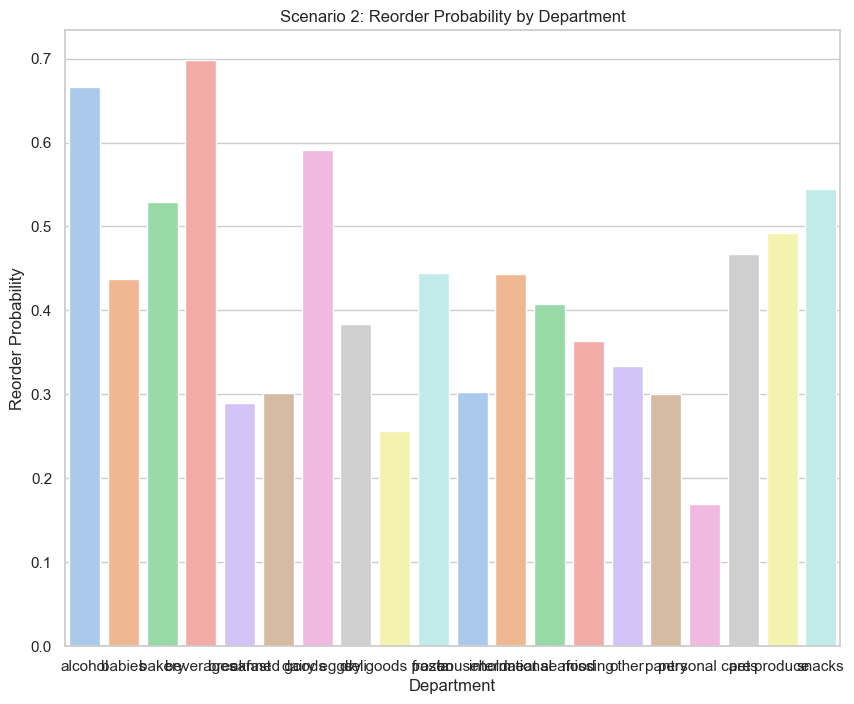

In [21]:
# Scenario 2: Reorder Probability by Department
department_reorder_rate = data.groupby('department')['reordered'].mean().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='department', y='reordered', data=department_reorder_rate, palette='pastel')
plt.title('Scenario 2: Reorder Probability by Department')
plt.xlabel('Department')
plt.ylabel('Reorder Probability')
plt.show()

C:\Users\cis101\AppData\Local\Temp\ipykernel_11160\3737375002.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='days_since_prior_order', y='reordered', data=days_since_prior_order_reorder_rate, palette='mako')
C:\Users\cis101\AppData\Local\Temp\ipykernel_11160\3737375002.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='order_hour_of_day', y='reordered', data=order_hour_of_day_reorder_rate, palette='mako')


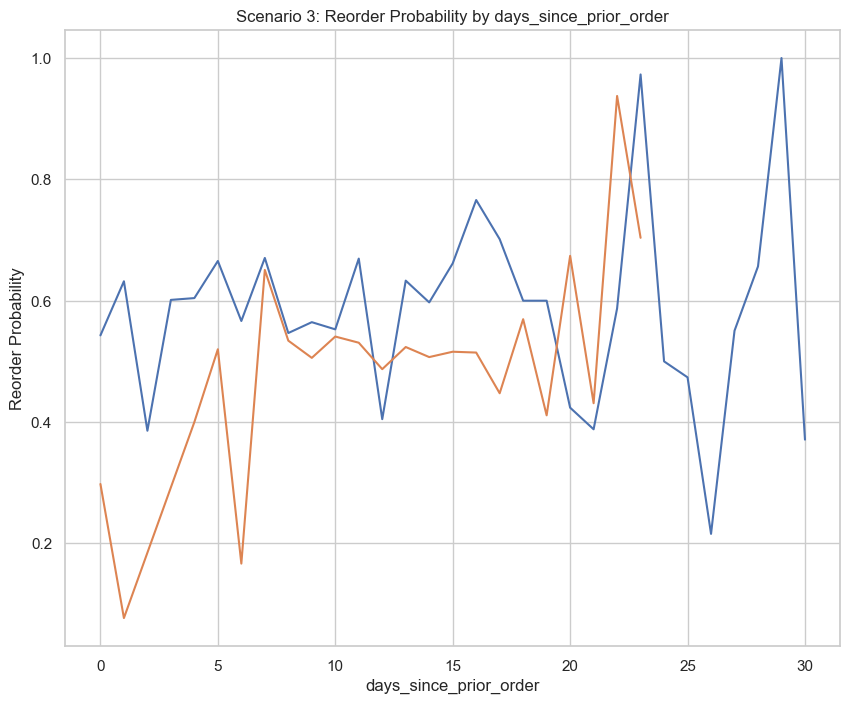

In [24]:
# Scenario 3: Reorder Probability by days_since_prior_order
days_since_prior_order_reorder_rate = data.groupby('days_since_prior_order')['reordered'].mean().reset_index()
order_hour_of_day_reorder_rate = data.groupby('order_hour_of_day')['reordered'].mean().reset_index()

plt.figure(figsize=(10, 8))
sns.lineplot(x='days_since_prior_order', y='reordered', data=days_since_prior_order_reorder_rate, palette='mako')
sns.lineplot(x='order_hour_of_day', y='reordered', data=order_hour_of_day_reorder_rate, palette='mako')
plt.title('Scenario 3: Reorder Probability by days_since_prior_order')
plt.xlabel('days_since_prior_order')
plt.ylabel('Reorder Probability')
plt.show()